In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv(r"C:\Users\MAHE\Downloads\archive (2)\loan_status_dataset.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
## Statistical Measures
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
## Number of missing values in each column
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
## Dropping the missing values
dataset = dataset.dropna()

In [8]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
## Label Encoding
dataset = dataset.dropna()

In [10]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [11]:
## Dependent column values
dataset.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [12]:
## Replacing 3+ with 4
dataset.replace({"Dependents":{"3+":4}},inplace = True)

In [13]:
dataset.Dependents.value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

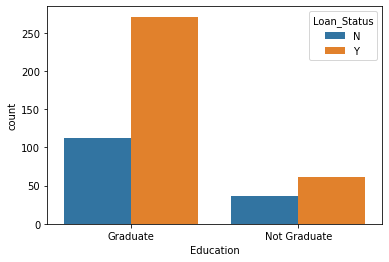

In [14]:
## Data Visualization on Education and Loan Status
sns.countplot(x = 'Education',hue = 'Loan_Status',data = dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

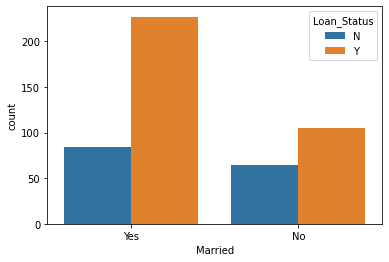

In [15]:
## Data Visualization on marital status
sns.countplot(x = 'Married',hue = 'Loan_Status',data = dataset )

<AxesSubplot:xlabel='Gender', ylabel='count'>

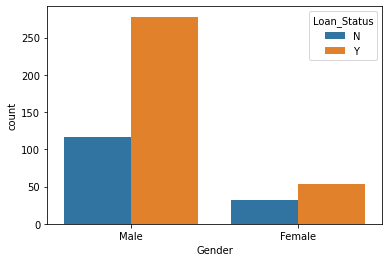

In [16]:
## Data Visualization with gender
sns.countplot(x = 'Gender', hue = "Loan_Status",data = dataset)

In [17]:
## Replacing all categorical values to numerical values
dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0},
                 'Loan_Status':{'N':0,'Y':1}},inplace = True)

In [18]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [19]:
## Separating the data and label
X = dataset.drop(columns = ['Loan_Status','Loan_ID'],axis = 1)
Y = dataset["Loan_Status"]

In [20]:
print(X,Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [21]:
## Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


In [23]:
## TESTING THE MODEL
## Support Vector Machine Model
classifier = svm.SVC(kernel = 'linear', C = 0.1)

In [24]:
## Training the SVM model
classifier.fit(X_train,Y_train)

SVC(C=0.1, kernel='linear')

In [25]:
## Model Evaluation
## accuracy score on training data
X_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred,Y_train)

In [26]:
print("Accuracy of the training data is",training_data_accuracy)

Accuracy of the training data is 0.7838541666666666


In [27]:
## accuracy score on test data
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred,Y_test)

In [28]:
print("Accuracy of the test data is",test_data_accuracy)

Accuracy of the test data is 0.8125


In [29]:
## Linear Regression Model
linreg = LinearRegression()

In [30]:
## Training the Linear Regression model
linreg.fit(X_train,Y_train)


LinearRegression()

In [31]:
Y_pred = linreg.predict(X_test) 


In [32]:
from sklearn import metrics

In [33]:
## Model Evaluation
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

0.3864646810742579


In [34]:
print('variance',linreg.score(X_test,Y_test))

variance 0.3048205976770193


In [35]:
## Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [36]:
logreg = LogisticRegression()

In [37]:
## Training the Logistic Regression model
logreg.fit(X_train,Y_train)

C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
Y_pred = logreg.predict(X_test) 

In [39]:
## Model Evaluation
score =accuracy_score(Y_test,Y_pred)
print("Accuracy of th model is",score)

Accuracy of th model is 0.8333333333333334


Amongst the 3 models used the Logistic Regression model with an accuracy of 0.833 is the best fit for the dataset.